## Propensity Score Matching: A Non-experimental Approach to Causal Inference

### Propensity Score Matching in Python using package called *psmpy* [link](https://pypi.org/project/psmpy/)

Propensity score matching (PSM) is a statistical technique used with retrospective data that attempts to perform the task that would normally occur in a Randomized Control Trial(RCT).

Covariates are potential confounders that could bias our results. Any changes in the outcome can be attributable to the the intervention performed, giving us a potential causal link.

In [2]:
# !pip install psmpy

  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 7.2 MB 2.5 MB/s eta 0:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=060765e2570ea0c72c8430d8b997a88e8bd782cc80709847167313d45803944c
  Stored in directory: /Users/dpong/Library/Caches/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [5]:
# !pip install psmpy

In [21]:
import seaborn as sns
import pandas as pd
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
from random import sample
import numpy as np

In [3]:

sns.set(rc={'figure.figsize':(10,8)}, font_scale = 1.3)
# read in your data
fname="heart_disease_health_indicators_BRFSS2015.csv"
data = pd.read_csv(fname)

In [4]:
pd. set_option('display.max_columns', None)
data.head()

data.reindex(range(len(data)))

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
# data.head()
# range(len(data))
data.info()

data.index.name = 'pid'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data.index.name

'pid'

In [7]:
data.reset_index(inplace =True)

In [8]:
data

,pid,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Randomly subsample the data dataframe to 10% of its original size

In [27]:
df = data.copy()
df2 = df.loc[np.random.permutation(df.index)[:25360]]


CohenD calculates the effect size and is available to calculate the effect size exerted by variables before and after matching. The closer this number is to 0 the more we have been able to effectively control the covaiates. Normally we set the ceiling of this cohenD effect size to 0.1.

In [28]:
# psm = PsmPy(data, treatment='AnyHealthcare', indx='pid', exclude = [])

psm = PsmPy(df2, treatment='AnyHealthcare', indx='pid', exclude = [])

In [29]:
psm.logistic_ps(balance = True)

In [30]:
psm.predicted_data

,pid,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,propensity_score,propensity_logit,AnyHealthcare
0,219083,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,0.175472,-1.547334,0
1,26768,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,5.0,8.0,0.557642,0.231596,0
2,189855,1.0,1.0,1.0,1.0,32.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,30.0,1.0,0.0,13.0,4.0,4.0,0.890131,2.092082,0
3,196266,0.0,1.0,1.0,1.0,34.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,5.0,1.0,0.437290,-0.252169,0
4,13647,0.0,0.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,4.0,7.0,0.651113,0.623935,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,170278,0.0,0.0,0.0,0.0,33.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,2.0,3.0,4.0,0.047184,-3.005374,1
25356,59696,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,10.0,30.0,1.0,0.0,6.0,4.0,8.0,0.885280,2.043412,1
25357,178660,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0,0.632476,0.542853,1
25358,109005,0.0,1.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,7.0,0.753375,1.116695,1


In [31]:
psm.predicted_data['AnyHealthcare'].describe()

count    25360.000000
mean         0.950473
std          0.216970
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: AnyHealthcare, dtype: float64

#### psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)
matcher - propensity_logit (default) and generated in previous step alternative option is propensity_score, specifies the argument on which matching will proceed <br>
replacement - False (default), determines whether macthing will happen with or without replacement, when replacement is false matching happens 1:1 <br>
caliper - None (default), user can specify caliper size relative to std. dev of the control sample, restricting neighbors eligible to match <br>

## Perform KNN matching

In [33]:
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

#### psm.plot_match(Title='Side by side matched controls', Ylabel='Number ofpatients', Xlabel= 'Propensity logit',names = ['treatment', 'control'],save=True) <br>
title - 'Side by side matched controls' (default), creates plot title <br>
Ylabel - 'Number of patients' (default), string, label for y-axis <br>
Xlabel - 'Propensity logit' (default), string, label for x-axis <br>
names - ['treatment', 'control'] (default), list of strings for legend <br>
save - False (default), saves the figure generated to current working directory if True <br>

## Plot the distribution of the propensity scores (or logits) for the two groups side by side.

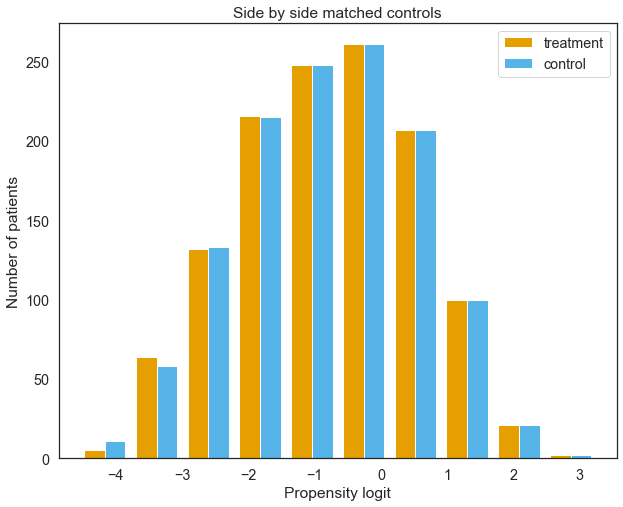

In [39]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

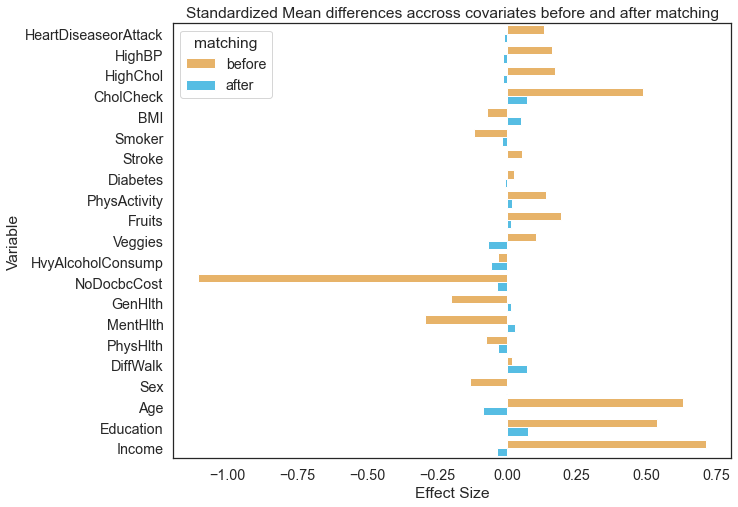

In [40]:
psm.effect_size_plot(save=False) #save - False (default), saves the figure generated tocurrent working directory if True

In [43]:
psm.matched_ids

,pid,matched_ID
0,219083,186867
1,26768,130183
2,189855,90592
3,196266,97453
4,13647,23319
...,...,...
1251,104805,96062
1252,83599,51066
1253,208986,81822
1254,7274,33690


Note: That not all matches will be unique if replacement=True

In [44]:
psm.effect_size

,Variable,matching,Effect Size
0,HeartDiseaseorAttack,before,0.130878
1,HeartDiseaseorAttack,after,-0.010373
2,HighBP,before,0.159609
3,HighBP,after,-0.013298
4,HighChol,before,0.171351
5,HighChol,after,-0.015100
6,CholCheck,before,0.488684
7,CholCheck,after,0.072380
8,BMI,before,-0.073009
9,BMI,after,0.051733


Note: The thresholds for a small, medium and large effect size were characterized by Cohen. Where relative size effect are classified as: small≤ 0.2, medium≤ 0.5, large≤0.8. <br>
Ideally, "after" matching the effect size exerted by the variable should be smaller than the "before". The closer these effect sizes are to 0 the less our outcomes of interest will depend on that covariate. <br>

## Refernces: 
1. https://towardsdatascience.com/psmpy-propensity-score-matching-in-python-a3e0cd4d2631
2. https://pypi.org/project/psmpy/